In [1]:
import pandas as pd
import numpy as np
import random
import math
import csv
#from compiler.ast import flatten
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers
from keras.layers import *
from keras.initializers import *
from keras.models import *
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
import csv
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
data = pd.read_csv("D:/train_data.csv")

In [3]:
data.describe()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,0.074208,12.892600,35.710800,22.818200,24.289333,24.311514,13.482760,0.556307,0.005909,-1.087423,6.338912,62864.83810,67405.41150
std,0.062775,2.193164,2.281568,2.866820,2.115211,1.611091,1.378311,0.060848,0.118519,0.171528,3.079520,25332.27436,34339.67523
min,-0.000011,4.000000,11.000000,2.666667,8.000000,8.337657,1.593529,0.085237,-0.824105,-1.810909,1.719803,257.00000,164.00000
25%,0.008453,12.000000,35.333333,22.333333,23.666667,23.810860,13.442471,0.549257,-0.037888,-1.173414,4.150245,49030.50000,38198.75000
50%,0.067164,12.333333,36.333333,23.666667,24.333333,24.367030,13.841308,0.569862,0.004599,-1.138531,5.458451,64870.50000,73193.50000
75%,0.133491,13.333333,36.666667,24.333333,25.000000,24.825732,14.070108,0.582108,0.050779,-1.064627,7.914005,79393.25000,98232.75000
max,0.189822,36.333333,46.666667,34.000000,41.833333,39.742037,16.608982,0.811502,1.148918,1.708877,19.457059,129205.00000,119324.00000


In [4]:
data.head()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
0,0.139707,12.333333,36.333333,24.000000,24.333333,24.381301,14.065408,0.576893,0.031724,-1.159762,8.153378,71569.0,99088.0
1,0.106818,12.000000,36.333333,24.333333,24.333333,24.390834,14.148785,0.580086,0.008994,-1.196956,8.071872,66831.0,91831.0
2,0.097962,13.333333,36.666667,23.333333,25.666667,25.000768,13.792478,0.551682,-0.085055,-1.135637,7.054699,71318.0,84607.0
3,0.127619,11.666667,36.333333,24.666667,23.666667,23.950023,14.104867,0.588929,0.033662,-1.161501,7.868250,73734.0,98938.0
4,0.000684,7.666667,36.000000,28.333333,18.000000,21.512252,15.391541,0.715478,0.263196,-1.335490,2.278612,41056.0,15888.0


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


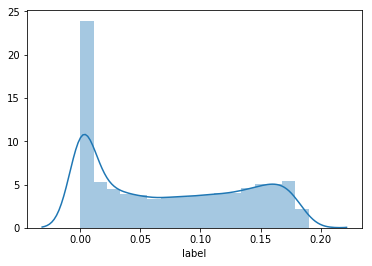

In [5]:
sns.distplot(data['label'])  
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


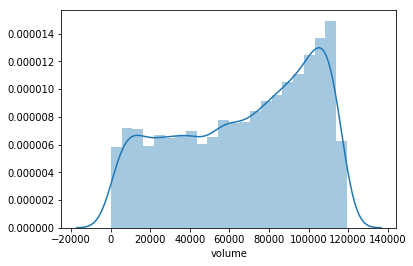

In [6]:
sns.distplot(data['volume'])  
plt.show()

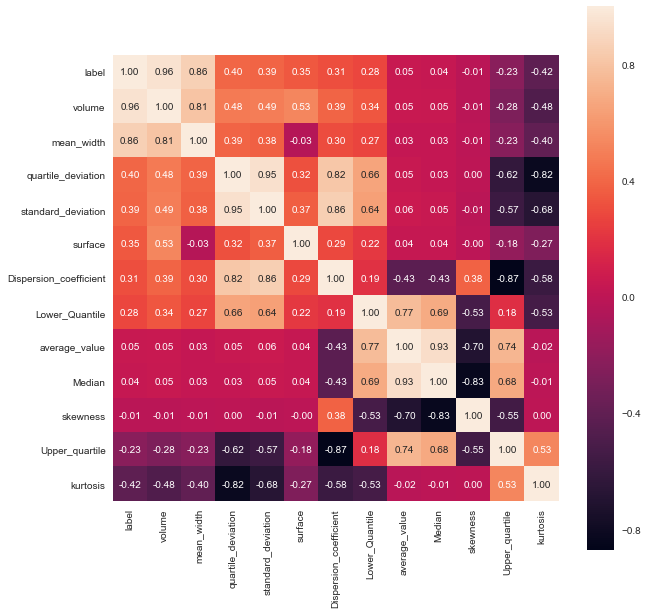

In [7]:
corrmat = data.corr()
plt.figure(figsize=(10,10))
k = 13 
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
X=data[['Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation','Dispersion_coefficient','skewness','kurtosis','mean_width','surface','volume']]
Y=data[['label']]

In [10]:
X.head()

,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
0,12.333333,36.333333,24.000000,24.333333,24.381301,14.065408,0.576893,0.031724,-1.159762,8.153378,71569.0,99088.0
1,12.000000,36.333333,24.333333,24.333333,24.390834,14.148785,0.580086,0.008994,-1.196956,8.071872,66831.0,91831.0
2,13.333333,36.666667,23.333333,25.666667,25.000768,13.792478,0.551682,-0.085055,-1.135637,7.054699,71318.0,84607.0
3,11.666667,36.333333,24.666667,23.666667,23.950023,14.104867,0.588929,0.033662,-1.161501,7.868250,73734.0,98938.0
4,7.666667,36.000000,28.333333,18.000000,21.512252,15.391541,0.715478,0.263196,-1.335490,2.278612,41056.0,15888.0


In [11]:
Y.head()

,label
0,0.139707
1,0.106818
2,0.097962
3,0.127619
4,0.000684


In [0]:
#Normalization
max_min_scaler = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
N_X=X[:].apply(max_min_scaler)

In [24]:
N_X.head()

,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
0,0.257732,0.710280,0.680851,0.482759,0.510873,0.830603,0.676965,0.433766,0.184996,0.362715,0.553029,0.830178
1,0.247423,0.710280,0.691489,0.482759,0.511176,0.836156,0.681361,0.422245,0.174429,0.358120,0.516286,0.769277
2,0.288660,0.719626,0.659574,0.522167,0.530598,0.812426,0.642252,0.374578,0.191850,0.300773,0.551083,0.708652
3,0.237113,0.710280,0.702128,0.463054,0.497140,0.833231,0.693537,0.434748,0.184502,0.346640,0.569819,0.828919
4,0.113402,0.700935,0.819149,0.295567,0.419515,0.918921,0.867783,0.551084,0.135071,0.031505,0.316399,0.131957


In [0]:
X_train, X_test, y_train, y_test = train_test_split(N_X,Y, test_size=0.2, random_state=0)

In [0]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [0]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [29]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train, y_train)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.013803, 0.0003
Ridge: 0.013858, 0.0003
Lasso: 0.039335, 0.0003


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

RF: 0.007837, 0.0004


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GBR: 0.007294, 0.0003
SVR: 0.066082, 0.0002


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

LinSVR: 0.014032, 0.0004
Ela: 0.015606, 0.0003
SGD: 0.021082, 0.0003
Bay: 0.013804, 0.0003


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Ker: 0.011607, 0.0003


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Extra: 0.007919, 0.0003
Xgb: 0.007281, 0.0003


In [0]:
#GBR: 0.007294, 0.0003
#Extra: 0.007919, 0.0003
#Xgb: 0.007281, 0.0003

In [0]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [33]:
#GradientBoostingRegressor()
grid(GradientBoostingRegressor()).grid_get(X_train,y_train,{'n_estimators':[50,100,150]})

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

{'n_estimators': 100} 0.0073008889795589775
                  params  mean_test_score  std_test_score
0   {'n_estimators': 50}         0.007370        0.000004
1  {'n_estimators': 100}         0.007301        0.000004
2  {'n_estimators': 150}         0.007316        0.000005


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [34]:
GBR=GradientBoostingRegressor(n_estimators=100)
GBR.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [35]:
#ExtraTreesRegressor()
grid(ExtraTreesRegressor()).grid_get(X_train,y_train,{'n_estimators':[100],'max_features':[1,2,3]})

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

{'max_features': 3, 'n_estimators': 100} 0.00766277079405002
                                     params  mean_test_score  std_test_score
0  {'max_features': 1, 'n_estimators': 100}         0.010307        0.000004
1  {'max_features': 2, 'n_estimators': 100}         0.008274        0.000003
2  {'max_features': 3, 'n_estimators': 100}         0.007663        0.000004


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [36]:
ETR=ExtraTreesRegressor(n_estimators=100,max_features=3)
ETR.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
#XGBRegressor()
grid(XGBRegressor()).grid_get(X_train,y_train,{'n_estimators':[80,85,90,95,100],'gamma':[0.0001,0.001,0.01,0.1,0.00000000001]})

{'gamma': 1e-11, 'n_estimators': 100} 0.007286751495073704
                                    params  mean_test_score  std_test_score
0    {'gamma': 0.0001, 'n_estimators': 80}         0.007300        0.000004
1    {'gamma': 0.0001, 'n_estimators': 85}         0.007294        0.000004
2    {'gamma': 0.0001, 'n_estimators': 90}         0.007292        0.000004
3    {'gamma': 0.0001, 'n_estimators': 95}         0.007289        0.000004
4   {'gamma': 0.0001, 'n_estimators': 100}         0.007288        0.000004
5     {'gamma': 0.001, 'n_estimators': 80}         0.007373        0.000004
6     {'gamma': 0.001, 'n_estimators': 85}         0.007372        0.000004
7     {'gamma': 0.001, 'n_estimators': 90}         0.007372        0.000004
8     {'gamma': 0.001, 'n_estimators': 95}         0.007372        0.000004
9    {'gamma': 0.001, 'n_estimators': 100}         0.007372        0.000004
10     {'gamma': 0.01, 'n_estimators': 80}         0.007723        0.000004
11     {'gamma': 0.01, 'n_est

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [38]:
XGBR=XGBRegressor(gamma=1e-11, n_estimators=100)
XGBR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1e-11, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [0]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [40]:
w1 = 0.4
w2 = 0.2
w3 = 0.4
weight_avg = AverageWeight(mod =[GBR,ETR,XGBR],weight=[w1,w2,w3])
score = rmse_cv(weight_avg,X_train,y_train)
print(score.mean())

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
D:\Anaconda3\l

0.007269581174482891


In [54]:
weight_avg.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


AverageWeight(mod=[GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_sp..., reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)],
       weight=[0.4, 0.2, 0.4])

In [0]:
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [55]:
compute_rmse(np.array(weight_avg.predict(X_test)),np.array(y_test))

0.08844368977051961

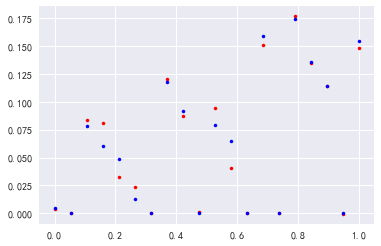

In [56]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,np.array(weight_avg.predict(X_test[0:20])),'r.',x,np.array(y_test[0:20]),'b.')

In [0]:
GBR=GradientBoostingRegressor(n_estimators=100)
ETR=ExtraTreesRegressor(n_estimators=100,max_features=3)
XGBR=XGBRegressor(gamma=1e-11, n_estimators=100)

In [0]:
import numpy as np
from sklearn.model_selection import KFold

In [0]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train,y)
        return self

    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)

    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [0]:
a = Imputer().fit_transform(X_train)
b = Imputer().fit_transform(y_train.values.reshape(-1,1)).ravel()

In [0]:
stack_model = stacking(mod=[GBR,ETR,XGBR],meta_model=GBR)

In [62]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

0.007322363231011163


In [63]:
stack_model.fit(a,b)

stacking(meta_model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
     mod=[GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_sp..., reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)])

In [65]:
compute_rmse(np.array(stack_model.predict(pd.DataFrame.as_matrix(X_test))),np.array(y_test))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.0885651250270044

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


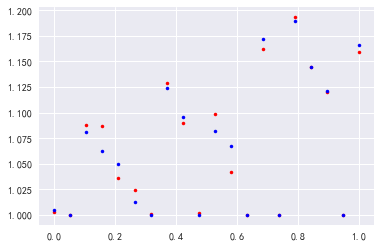

In [66]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,np.exp(stack_model.predict(pd.DataFrame.as_matrix(X_test[0:20]))),'r.',x,np.exp(y_test[0:20]),'b.')